In [1]:
from accelerator_environments.wrappers import NormalizeAction, NormalizeObservation, ScaleReward, ScaleActuators
from accelerator_environments.utils import unwrap
from gym.wrappers import TimeLimit

from environments.simulation import ARESEAJOSS

initializing ocelot...


In [2]:
env = ARESEAJOSS()
env = TimeLimit(env, max_episode_steps=50)
env = NormalizeAction(env)
env = NormalizeObservation(env)
env = ScaleReward(env, unwrap(env).observation_space.high[:4].sum() * 1e-3)
env

<ScaleReward<NormalizeObservation<NormalizeAction<TimeLimit<ARESEAJOSS instance>>>>>

In [3]:
env.observation_space.low, env.observation_space.high

(array([-1., -1.,  0.,  0.,  0., -1., -1., -1., -1., -1.], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [4]:
env.reset()

array([ 0.49148825, -0.21195945,  6.8798695 ,  0.36450922,  0.69431   ,
       -0.04121377, -0.64916592, -0.98904661, -0.63102618, -0.92704182])

In [5]:
env.target

array([-0.00062077,  0.00067374,  0.00097776,  0.00020611])

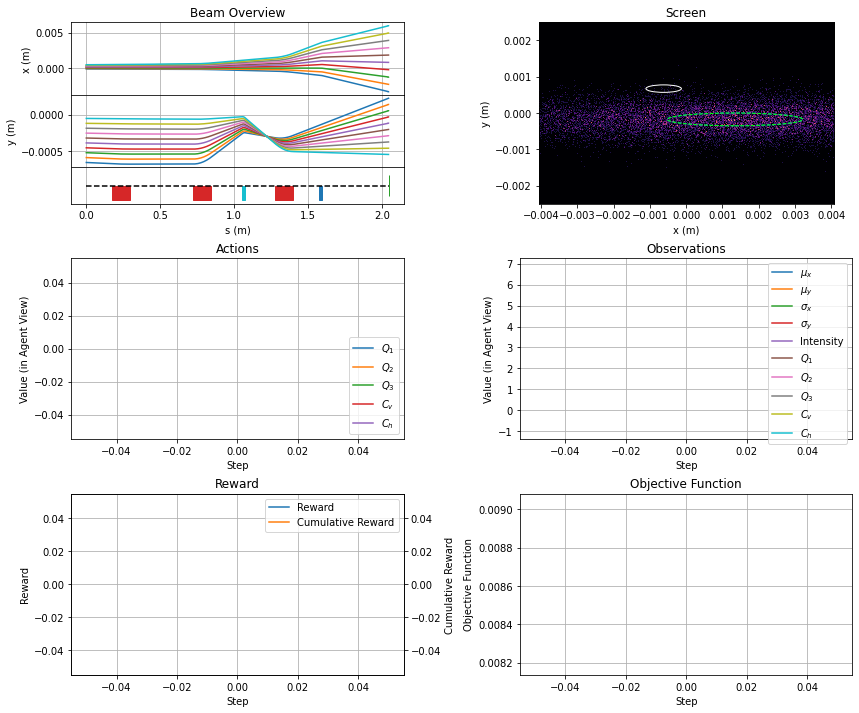

In [6]:
env.render()

[ 0.77819639 -0.20808332 12.32396201 -0.18838347]	308.24009	False
[ 0.82842493 -0.2452985  13.59916562 -0.33350267]	-168.86738	False
[ 0.91253626 -0.27439555 14.78931171 -0.29142257]	-155.82797	False
[ 1.07997411 -0.27323135 17.25397899 -0.3922278 ]	-308.80367	False
[ 1.10002131 -0.3088033  17.32429337 -0.29917099]	-23.21393	False
[ 0.91468197 -0.32174698 14.40612986 -0.44814993]	330.10568	False
[ 0.98226939 -0.32619977 15.38774638 -0.45165062]	-122.30165	False
[ 0.89630758 -0.36054977 14.44929561 -0.44934791]	108.98295	False
[ 1.0733904  -0.38283977 17.32818309 -0.36543284]	-344.71237	False
[ 1.31040087e+00 -4.16552264e-01  2.06198268e+01 -6.14089337e-03]	-389.63329	False


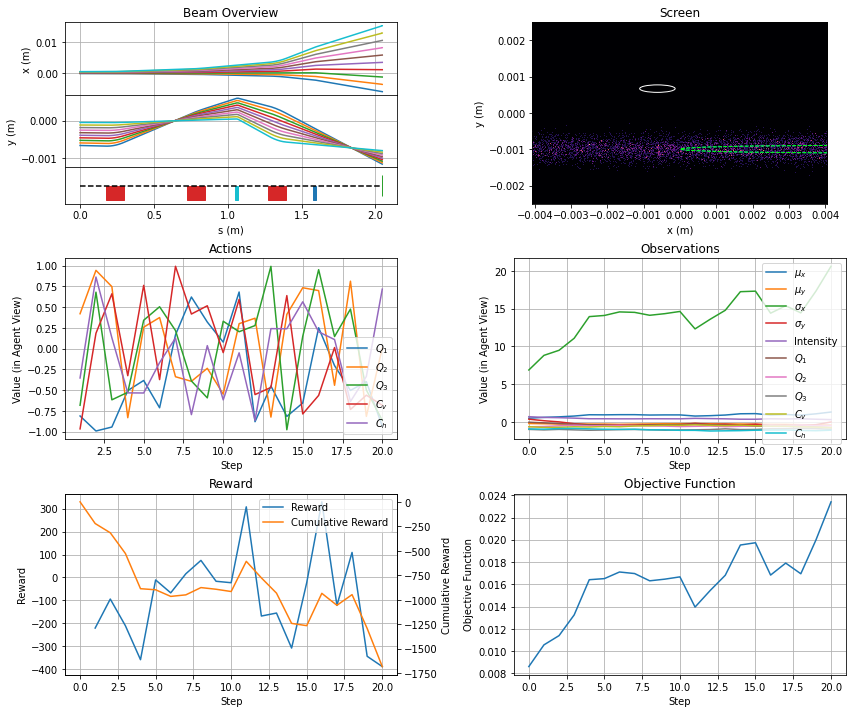

In [8]:
for _ in range(10):
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(f"{observation[:4]}\t{reward:.5f}\t{done}")

env.render()

In [8]:
env.reset()
env.beam_parameters

array([-0.00074412, -0.00750673, -0.00040203,  0.00427621])

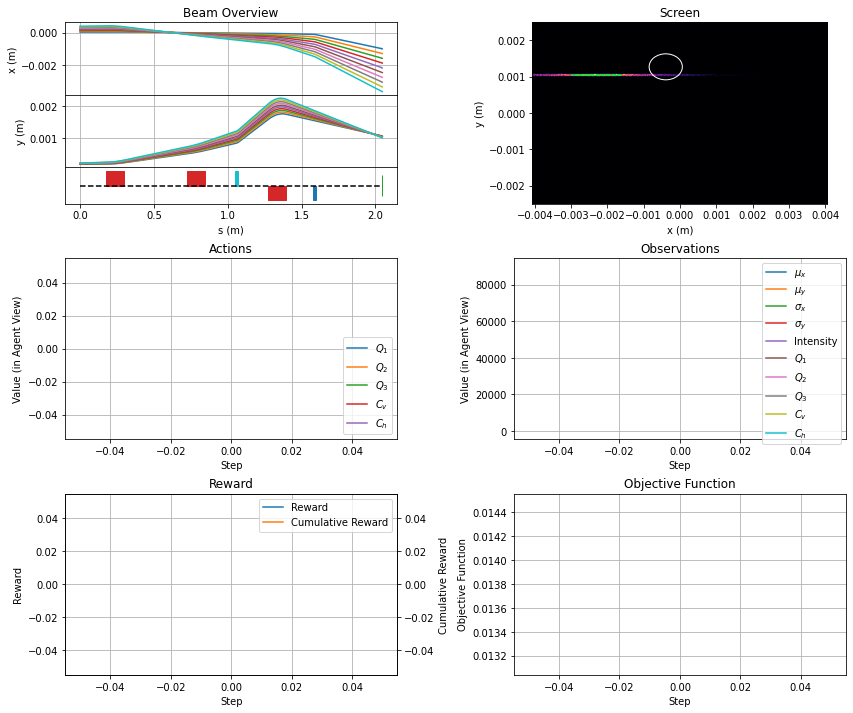

      fun: 0.01354909442399231
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 2.25922231e-04,  1.36847824e-04,  3.25300549e-05,  7.07501572e-01,
       -4.50000000e-01])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 234
      nit: 4
     njev: 39
   status: 0
  success: True
        x: array([ 9.99999168e-01,  9.99999293e-01,  9.99999850e-01,  7.87403276e-04,
       -1.72044362e-03])


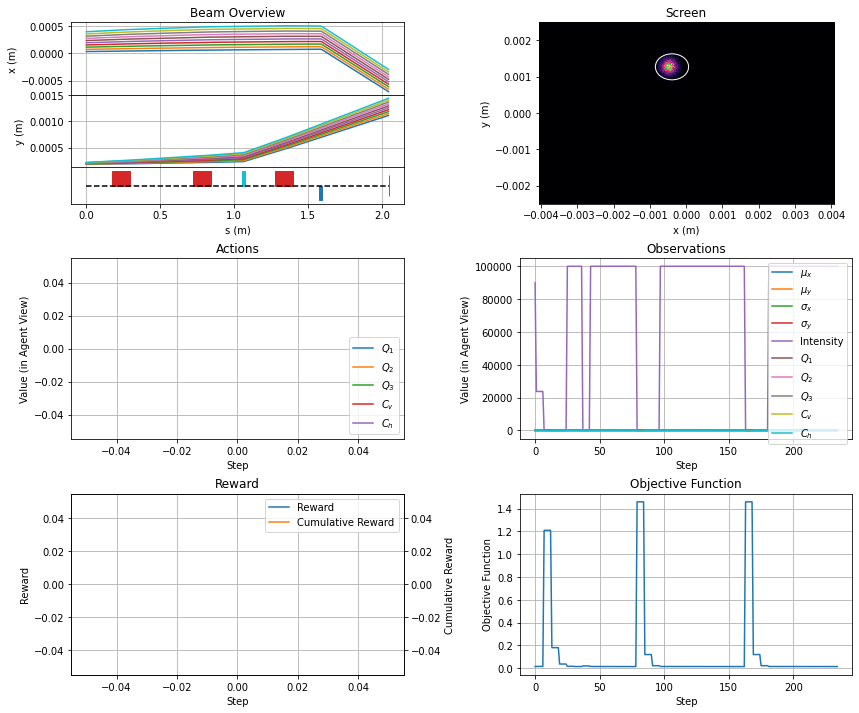

In [9]:
from scipy import optimize

env = ARESEAJOSS()
env = ScaleActuators(env, env.optimization_space.high)
env.reset()

env.render()
bounds = optimize.Bounds(env.optimization_space.low, env.optimization_space.high)
x = optimize.minimize(fun=env.evaluate,
                      x0=env.initial_actuators,
                      bounds=bounds)
print(x)
env.render()

In [10]:
env.beam_parameters

array([-9.75054913e-05, -1.45174802e-09, -7.71380050e-04, -5.73778248e-04])

In [11]:
env.actuators

array([ 9.99999168e-01,  9.99999293e-01,  9.99999850e-01,  7.87403276e-04,
       -1.72043362e-03])

In [12]:
bounds

Bounds(array([-1., -1., -1., -1., -1.], dtype=float32), array([1., 1., 1., 1., 1.], dtype=float32))

In [13]:
env.observation_space.high

array([4.e-03, 4.e-03, 4.e-04, 4.e-04, 1.e+05, 3.e+01, 3.e+01, 3.e+01,
       3.e-03, 3.e-03], dtype=float32)